# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd

## Regression Model Evaluation

In [4]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [17]:
from sklearn.model_selection import train_test_split as tts


X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [18]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()

linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
from sklearn.metrics import r2_score as r2

r2(y_train, y_pred_train)


0.7508856358979673

In [20]:
r2(y_test, y_pred_test)

0.6687594935356326

## 4. Calculate and print mean squared error for both the training and the testing set.

In [21]:
from sklearn.metrics import mean_squared_error as mse

In [22]:
mse(y_train, y_pred_train, squared=False)

4.6520331848801675

In [23]:
mse(y_test, y_pred_test, squared=False)

4.928602182665332

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [25]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, y_pred_train)

3.314771626783221

In [26]:
mae(y_test, y_pred_test)

3.1890919658878363

## Classification Model Evaluation

In [27]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [28]:
from sklearn.model_selection import train_test_split as tts


X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [29]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)

C:\Users\usuario\.conda\envs\clase\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

In [31]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [34]:
# En la clasificación de etiquetas múltiples, esta función calcula la precisión del subconjunto.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

1.0

In [35]:
accuracy_score(y_train, y_pred_train)

0.975

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [36]:
# La precisión equilibrada en problemas de clasificación binaria y multiclase para tratar con conjuntos de datos desequilibrados.
# Se define como el promedio de recuerdo obtenido en cada clase.


from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred_test)

1.0

In [37]:
balanced_accuracy_score(y_train, y_pred_train)

0.975609756097561

## 10. Calculate and print the precision score for both the training and the testing set.

In [38]:
# La precisión es la relación tp / (tp + fp) donde tp es el número de verdaderos positivos y fp el número de falsos positivos. 
# La precisión es intuitivamente la capacidad del clasificador no de etiquetar como positiva una muestra que es negativa.

from sklearn.metrics import precision_score 

precision_score(y_test, y_pred_test, average='macro')


1.0

In [39]:
precision_score(y_train, y_pred_train, average='macro')

0.9761904761904763

## 11. Calculate and print the recall score for both the training and the testing set.

In [40]:
# El recall es la relación tp / (tp + fn) donde tp es el número de verdaderos positivos y fn el número de falsos negativos. 
# La recall es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas.

from sklearn.metrics import recall_score

recall_score(y_test, y_pred_test, average='macro')

1.0

In [41]:
recall_score(y_train, y_pred_train, average='macro')

0.975609756097561

## 12. Calculate and print the F1 score for both the training and the testing set.

In [42]:
# La puntuación F1 se puede interpretar como una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. 
# La contribución relativa de precisión y recuperación a la puntuación F1 es igual.

from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test, average='macro')

1.0

In [43]:
f1_score(y_train, y_pred_train, average='macro')

0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [46]:
confusion_matrix(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

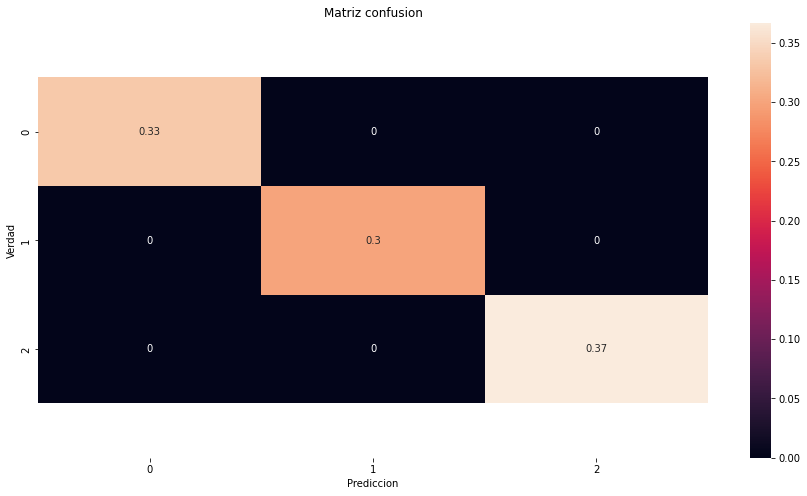

In [50]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(confusion_matrix(y_test,  y_pred_test)/sum(sum(confusion_matrix(y_test,  y_pred_test))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

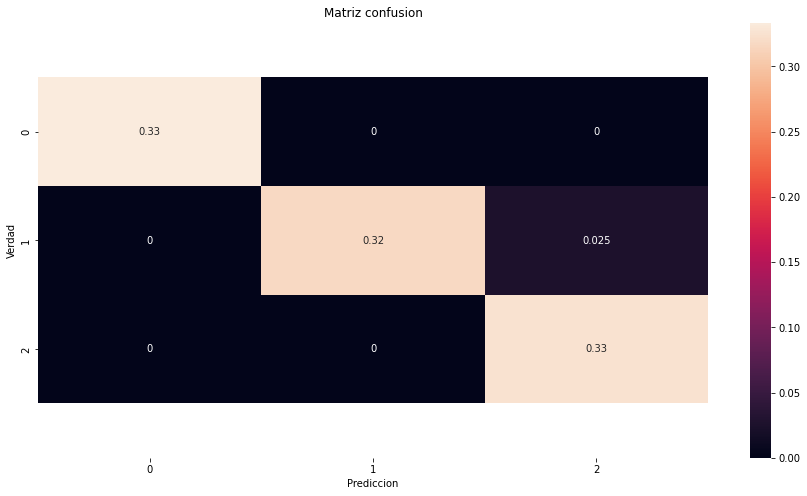

In [51]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(confusion_matrix(y_train,  y_pred_train)/sum(sum(confusion_matrix(y_train,  y_pred_train))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [52]:
from sklearn.ensemble import RandomForestClassifier 

In [53]:
bosque = RandomForestClassifier()

bosque.fit(X_train, y_train)
y_pred_train = bosque.predict(X_train)
y_pred_test = bosque.predict(X_test)

C:\Users\usuario\AppData\Local\Temp\ipykernel_9212\3771926012.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bosque.fit(X_train, y_train)


In [54]:
bosque.score(X_train, y_train)

1.0

In [55]:
bosque.score(X_test, y_test)

1.0